<a href="https://colab.research.google.com/github/pdelfidali/SNDL/blob/main/HomeAssignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Home assignment 2
## Piotr del Fidali

### Load MNIST dataset
We load MNIST dataset using function from a keras library. By default, it divides data to 60.000 record for train and 10.000 test sets. We also change the types to float and divide them by 255, so the range of values is (0, 1) rather than (0, 255). Next, we reshape data so the single observation is vector with length of 784 (not matrix with 28x28 size).

In [2]:
from keras.src.utils import to_categorical
from keras.datasets.mnist import load_data

(x_train, y_train), (x_test, y_test) = load_data()
x_train = x_train.astype('float32') /255.
x_test = x_test.astype('float32') /255.

x_train = x_train.reshape(60000, 28*28)
x_test = x_test.reshape(10000, 28*28)

print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)

Training data shape: (60000, 784)
Testing data shape: (10000, 784)


We define the function that will select only observations for given digits. It will also ensure that the length of y vector is the same as the number of digits in given range. To work properly, argument digit_range should be next digits (ex. [1, 2, 3] but not [2, 5, 7]).

In [3]:
import numpy as np

def vertical_slice_data(x_data, y_data, digit_range):
    indices = np.where(np.isin(y_data, digit_range))[0]
    y_sliced = y_data[indices]
    y_sliced = y_sliced - min(digit_range)
    return x_data[indices], to_categorical(y_sliced)

x_train_0_to_2, y_train_0_to_2 = vertical_slice_data(x_train, y_train, [0, 1, 2])
x_train_3_to_5, y_train_3_to_5 = vertical_slice_data(x_train, y_train, [3, 4, 5])
x_train_6_to_9, y_train_6_to_9 = vertical_slice_data(x_train, y_train, [6, 7, 8, 9])

x_test_0_to_2, y_test_0_to_2 = vertical_slice_data(x_test, y_test, [0, 1, 2])
x_test_3_to_5, y_test_3_to_5 = vertical_slice_data(x_test, y_test, [3, 4, 5])
x_test_6_to_9, y_test_6_to_9 = vertical_slice_data(x_test, y_test, [6, 7, 8, 9])


print("Amount of samples in training datasets after slicing:")
print(f'0-2: {y_train_0_to_2.shape} - {len(y_train_0_to_2)/len(y_train):.2%} of full training')
print(f'3-5: {y_train_3_to_5.shape} - {len(y_train_3_to_5)/len(y_train):.2%} of full training')
print(f'6-9: {y_train_6_to_9.shape} - {len(y_train_6_to_9)/len(y_train):.2%} of full training')

print("Amount of samples in test datasets after slicing:")
print(f'0-2: {y_test_0_to_2.shape} - {len(y_test_0_to_2)/len(y_test):.2%} of full test')
print(f'3-5: {y_test_3_to_5.shape} - {len(y_test_3_to_5)/len(y_test):.2%} of full test')
print(f'6-9: {y_test_6_to_9.shape} - {len(y_test_6_to_9)/len(y_test):.2%} of full test')

Amount of samples in training datasets after slicing:
0-2: (18623, 3) - 31.04% of full training
3-5: (17394, 3) - 28.99% of full training
6-9: (23983, 4) - 39.97% of full training
Amount of samples in test datasets after slicing:
0-2: (3147, 3) - 31.47% of full test
3-5: (2884, 3) - 28.84% of full test
6-9: (3969, 4) - 39.69% of full test


## Train local models using each remote local dataset

We train three models for 0–2, 3–5, 6–9 digits. We  

In [4]:
from keras.models import Sequential
from keras.layers import Input, Dense
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score, precision_score, accuracy_score

model_0_to_2 = Sequential()
model_0_to_2.add(Dense(512, activation='relu', input_shape=(28*28, )))
model_0_to_2.add(Dense(3, activation='softmax'))
model_0_to_2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model_0_to_2.summary()

model_0_to_2.fit(x_train_0_to_2, y_train_0_to_2, epochs=10, batch_size=128)
test_loss, test_accu = model_0_to_2.evaluate(x_test_0_to_2, y_test_0_to_2)
y_pred_0_to_2 = model_0_to_2.predict(x_test_0_to_2)
test_recall = recall_score(y_test_0_to_2.argmax(1), y_pred_0_to_2.argmax(1), average=None)
test_precision = precision_score(y_test_0_to_2.argmax(1), y_pred_0_to_2.argmax(1), average=None)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 3)                 1539      
                                                                 
Total params: 403459 (1.54 MB)
Trainable params: 403459 (1.54 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
146/146 [==============================] - 2s 10ms/step - loss: 0.0704 - accuracy: 0.9773
Epoch 2/10
146/146 [==============================] - 1s 10ms/step - loss: 0.0213 - accuracy: 0.9933
Epoch 3/10
146/146 [==============================] - 1s 10ms/step - loss: 0.0134 - accuracy: 0.9962
Epoch 4/10
146/146 [==============================] - 2s 13ms/step - loss: 0.0089 - accuracy: 0.9976
Epoch 5/10
1

In [5]:
print('Model for 0, 1 and 2 digits classification')
print(f'\tTest loss: {test_loss:5f}\n\tTest accuracy: {test_accu:5f}')
for class_idx, recall in enumerate(test_recall):
    print(f"\tRecall for Class {class_idx}: {recall:.5f}")
for class_idx, recall in enumerate(test_precision):
    print(f"\tPrecision for Class {class_idx}: {recall:.5f}")

Model for 0, 1 and 2 digits classification
	Test loss: 0.013139
	Test accuracy: 0.994916
	Recall for Class 0: 0.99796
	Recall for Class 1: 0.99648
	Recall for Class 2: 0.99031
	Precision for Class 0: 0.99390
	Precision for Class 1: 0.99560
	Precision for Class 2: 0.99513


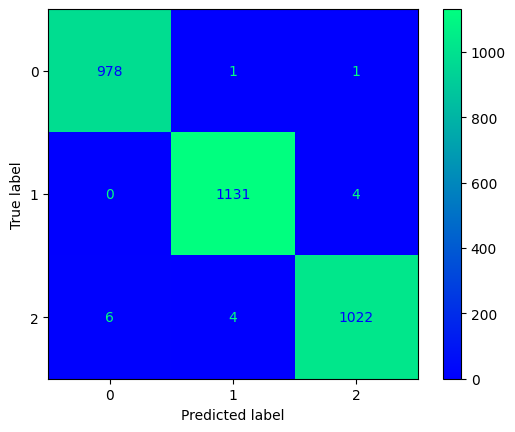

In [6]:
cm_0_to_2 = confusion_matrix(y_test_0_to_2.argmax(1), y_pred_0_to_2.argmax(1))
disp = ConfusionMatrixDisplay(cm_0_to_2, display_labels=[0, 1, 2])
disp.plot(cmap='winter')

In [7]:
model_3_to_5 = Sequential()
model_3_to_5.add(Dense(512, activation='relu', input_shape=(28*28, )))
model_3_to_5.add(Dense(3, activation='softmax'))
model_3_to_5.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model_3_to_5.summary()

model_3_to_5.fit(x_train_3_to_5, y_train_3_to_5, epochs=10, batch_size=128)
test_loss, test_accu = model_3_to_5.evaluate(x_test_3_to_5, y_test_3_to_5)
y_pred_3_to_5 = model_3_to_5.predict(x_test_3_to_5)
test_recall = recall_score(y_test_3_to_5.argmax(1), y_pred_3_to_5.argmax(1), average=None)
test_precision = precision_score(y_test_3_to_5.argmax(1), y_pred_3_to_5.argmax(1), average=None)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dense_3 (Dense)             (None, 3)                 1539      
                                                                 
Total params: 403459 (1.54 MB)
Trainable params: 403459 (1.54 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
136/136 [==============================] - 2s 11ms/step - loss: 0.1429 - accuracy: 0.9475
Epoch 2/10
136/136 [==============================] - 2s 15ms/step - loss: 0.0490 - accuracy: 0.9838
Epoch 3/10
136/136 [==============================] - 2s 15ms/step - loss: 0.0286 - accuracy: 0.9902
Epoch 4/10
136/136 [==============================] - 1s 11ms/step - loss: 0.0176 - accuracy: 0.9951
Epoch 5/10

In [8]:
print('Model for 3, 4 and 5 digits classification')
print(f'\tTest loss: {test_loss:5f} \n\tAccuracy: {test_accu:.5f}')
for class_idx, recall in enumerate(test_recall):
    print(f"\tRecall for Class {class_idx + 3}: {recall:.5f}")
for class_idx, recall in enumerate(test_precision):
    print(f"\tPrecision for Class {class_idx + 3}: {recall:.5f}")

Model for 3, 4 and 5 digits classification
	Test loss: 0.017411 
	Accuracy: 0.99480
	Recall for Class 3: 0.99703
	Recall for Class 4: 0.99898
	Recall for Class 5: 0.98767
	Precision for Class 3: 0.99017
	Precision for Class 4: 0.99594
	Precision for Class 5: 0.99887


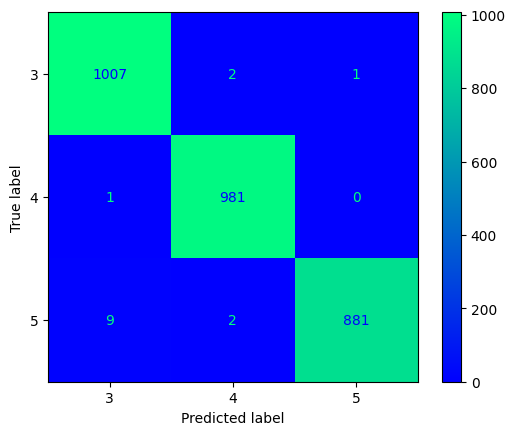

In [9]:
cm_3_to_5 = confusion_matrix(y_test_3_to_5.argmax(1), y_pred_3_to_5.argmax(1))
disp = ConfusionMatrixDisplay(cm_3_to_5, display_labels=[3, 4, 5])
disp.plot(cmap='winter')

In [10]:
model_6_to_9 = Sequential()
model_6_to_9.add(Dense(512, activation='relu', input_shape=(28*28, )))
model_6_to_9.add(Dense(4, activation='softmax'))
model_6_to_9.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model_6_to_9.summary()


model_6_to_9.fit(x_train_6_to_9, y_train_6_to_9, epochs=10, batch_size=128)
test_loss, test_accu = model_6_to_9.evaluate(x_test_6_to_9, y_test_6_to_9)
y_pred_6_to_9 = model_6_to_9.predict(x_test_6_to_9)
test_recall = recall_score(y_test_6_to_9.argmax(1), y_pred_6_to_9.argmax(1), average=None)
test_precision = precision_score(y_test_6_to_9.argmax(1), y_pred_6_to_9.argmax(1), average=None)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               401920    
                                                                 
 dense_5 (Dense)             (None, 4)                 2052      
                                                                 
Total params: 403972 (1.54 MB)
Trainable params: 403972 (1.54 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
188/188 [==============================] - 2s 10ms/step - loss: 0.1505 - accuracy: 0.9498
Epoch 2/10
188/188 [==============================] - 2s 10ms/step - loss: 0.0618 - accuracy: 0.9812
Epoch 3/10
188/188 [==============================] - 2s 10ms/step - loss: 0.0376 - accuracy: 0.9884
Epoch 4/10
188/188 [==============================] - 3s 14ms/step - loss: 0.0274 - accuracy: 0.9912
Epoch 5/10

In [11]:
print('Model for 6, 7, 8 and 9 digits classification')
print(f'\tTest loss: {test_loss:5f} \n\tAccuracy: {test_accu:.5f}')
for class_idx, recall in enumerate(test_recall):
    print(f"\tRecall for Class {class_idx + 6}: {recall:.5f}")
for class_idx, recall in enumerate(test_precision):
    print(f"\tPrecision for Class {class_idx + 6}: {recall:.5f}")

Model for 6, 7, 8 and 9 digits classification
	Test loss: 0.028260 
	Accuracy: 0.99017
	Recall for Class 6: 0.99061
	Recall for Class 7: 0.98735
	Recall for Class 8: 0.99281
	Recall for Class 9: 0.99009
	Precision for Class 6: 0.99476
	Precision for Class 7: 0.99607
	Precision for Class 8: 0.98272
	Precision for Class 9: 0.98715


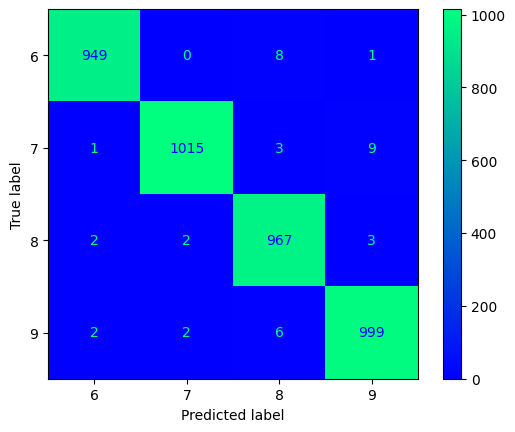

In [12]:
cm_6_to_9 = confusion_matrix(y_test_6_to_9.argmax(1), y_pred_6_to_9.argmax(1))
disp = ConfusionMatrixDisplay(cm_6_to_9, display_labels=[6, 7, 8, 9])
disp.plot(cmap='winter')

### Aggregate the local models into a global model

We create an Input layer that will take a single image and will pass it to each of our defined models. Then we combine outputs of models to a single vector of length 10, because of making models take next digits, we do not have to worry about any mapping.

In [13]:
from keras.models import Model
from keras.layers import Input, concatenate

common_input = Input(shape=(784,))

output_model_1 = model_0_to_2(common_input)
output_model_2 = model_3_to_5(common_input)
output_model_3 = model_6_to_9(common_input)

combined_output = concatenate([output_model_1, output_model_2, output_model_3])

combined_model = Model(inputs=common_input, outputs=combined_output)

In [14]:
y_pred = combined_model.predict(x_test)
test_accu = accuracy_score(y_test, y_pred.argmax(1))
test_recall = recall_score(y_test, y_pred.argmax(1), average=None)
test_precision = precision_score(y_test, y_pred.argmax(1), average=None)

313/313 [==============================] - 3s 9ms/step


In [15]:
print('Combined model digits classification')
print(f'\tAccuracy: {test_accu:.5f}')
for class_idx, recall in enumerate(test_recall):
    print(f"\tRecall for Class {class_idx}: {recall:.5f}")
for class_idx, recall in enumerate(test_precision):
    print(f"\tPrecision for Class {class_idx}: {recall:.5f}")

Combined model digits classification
	Accuracy: 0.86470
	Recall for Class 0: 0.96122
	Recall for Class 1: 0.97885
	Recall for Class 2: 0.69671
	Recall for Class 3: 0.91287
	Recall for Class 4: 0.91955
	Recall for Class 5: 0.85987
	Recall for Class 6: 0.81628
	Recall for Class 7: 0.81128
	Recall for Class 8: 0.83470
	Recall for Class 9: 0.84638
	Precision for Class 0: 0.89714
	Precision for Class 1: 0.89887
	Precision for Class 2: 0.73517
	Precision for Class 3: 0.69848
	Precision for Class 4: 0.85430
	Precision for Class 5: 0.88671
	Precision for Class 6: 0.93878
	Precision for Class 7: 0.98815
	Precision for Class 8: 0.90737
	Precision for Class 9: 0.92725


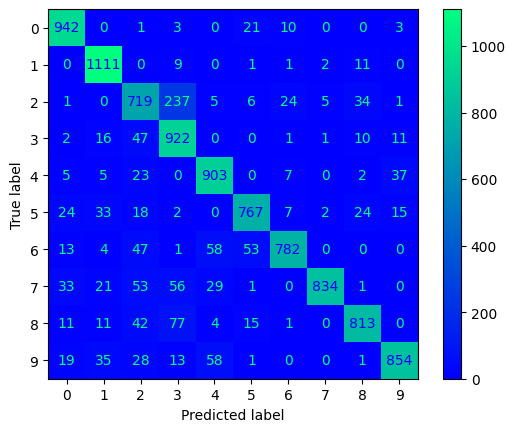

In [16]:
cm_combined_model = confusion_matrix(to_categorical(y_test).argmax(1), y_pred.argmax(1))
disp = ConfusionMatrixDisplay(cm_combined_model)
disp.plot(cmap='winter')

The combined model is not performing as well as models that predict only three or four classes. Although its performance is not as good, we can see that it does not make miss classifications inside the group it was learned in. For example, for digit range 0–2 there are only two miss classifications as another digit from the same range. For the second range it is also two and for third it's 3.  There is a lot '2' misclassified as '3' we can see that in confusion matrix. Recall value is smallest for class '2,' precision is worst for both class '2' and '3.' Overall, the model is performing well.

## Model trained on the full dataset

In [17]:
y_train = to_categorical(y_train)

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(28*28, )))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

model.fit(x_train, y_train, epochs=10, batch_size=128)
y_pred = model.predict(x_test)
test_accu = accuracy_score(y_test, y_pred.argmax(1))
test_recall = recall_score(y_test, y_pred.argmax(1), average=None)
test_precision = precision_score(y_test, y_pred.argmax(1), average=None)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               401920    
                                                                 
 dense_7 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
469/469 [==============================] - 5s 10ms/step - loss: 0.2592 - accuracy: 0.9263
Epoch 2/10
469/469 [==============================] - 6s 13ms/step - loss: 0.1070 - accuracy: 0.9685
Epoch 3/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0704 - accuracy: 0.9796
Epoch 4/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0506 - accuracy: 0.9846
Epoch 5/10

In [18]:
print('Model trained for full dataset digits classification')
print(f'\tAccuracy: {test_accu:.5f}')
for class_idx, recall in enumerate(test_recall):
    print(f"\tRecall for Class {class_idx}: {recall:.5f}")
for class_idx, recall in enumerate(test_precision):
    print(f"\tPrecision for Class {class_idx}: {recall:.5f}")

Model trained for full dataset digits classification
	Accuracy: 0.98230
	Recall for Class 0: 0.99082
	Recall for Class 1: 0.99383
	Recall for Class 2: 0.98450
	Recall for Class 3: 0.96634
	Recall for Class 4: 0.97963
	Recall for Class 5: 0.98767
	Recall for Class 6: 0.98434
	Recall for Class 7: 0.97568
	Recall for Class 8: 0.97536
	Recall for Class 9: 0.98414
	Precision for Class 0: 0.98479
	Precision for Class 1: 0.98774
	Precision for Class 2: 0.98069
	Precision for Class 3: 0.98886
	Precision for Class 4: 0.98566
	Precision for Class 5: 0.97889
	Precision for Class 6: 0.98434
	Precision for Class 7: 0.98045
	Precision for Class 8: 0.98958
	Precision for Class 9: 0.96221


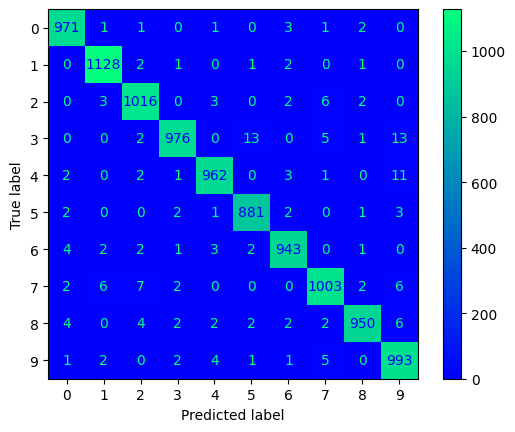

In [19]:
cm_full_model = confusion_matrix(y_test, y_pred.argmax(1))
disp = ConfusionMatrixDisplay(cm_full_model)
disp.plot(cmap='winter')

The model trained on full dataset, performance is much better than the combined model.

## Conclusion
Training the models for subsets of data might be beneficial if the dataset is huge:
   - it can save time for training
   - it can help to remove some classification errors, as we could observe there was little number of errors inside a specific group.


The model performance (all metrics) is better if we train the model on full dataset.